In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator,load_img
from keras._tf_keras.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# U ovom delu koda su ubačene potrebne biblioteke.

In [ ]:
img_width = 128
img_height = 128
img_size = ( 128, 128 )
img_channels = 3

# U ovom delu koda su podešene fotografije kako bi bile istih dimenzija.

In [ ]:
directory = "./dogs-vs-cats/train"
files = os.listdir ( directory ) 
labels = [ ]
filenames = [ ]

for file in files:
    if 'cat' in file:
        labels.append ( 0 ) 
    elif 'dog' in file:
        labels.append ( 1 ) 

    filenames.append ( file )

df = pd.DataFrame( {
    'filename': filenames,
    'label': labels
} )

print ( df.head ( ) )

# U ovom delu koda je izdefinisana putanja do foldera, i napravljena lista svih fotografija koje su ubačene u DataFrame. 

       filename  label
0     cat.0.jpg      0
1     cat.1.jpg      0
2    cat.10.jpg      0
3   cat.100.jpg      0
4  cat.1000.jpg      0


In [ ]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
model = Sequential ( )

model.add ( Conv2D ( 64, ( 3, 3 ), activation = 'relu' , input_shape = ( 128, 128, 3 ) ) )
model.add ( BatchNormalization ( ) )
model.add ( MaxPooling2D ( 2, 2 ) )
model.add ( Dropout ( 0.25 ) )
model.add ( Conv2D ( 64, ( 3, 3 ), activation = 'relu' ) )
model.add ( BatchNormalization ( ) )
model.add ( MaxPooling2D ( 2, 2 ) )
model.add ( Dropout ( 0.25 ) )
model.add ( Conv2D ( 128, ( 3, 3 ), activation = 'relu' ) )
model.add ( BatchNormalization ( ) )
model.add ( MaxPooling2D ( 2, 2 ) )
model.add ( Dropout ( 0.25 ) )
model.add ( Flatten ( ) )
model.add ( Dense ( 512, activation = 'relu' ) )
model.add ( BatchNormalization ( ) )
model.add ( Dropout ( 0.5 ) )
model.add ( Dense ( 2, activation = 'softmax' ) )
model.compile ( loss = 'categorical_crossentropy',
optimizer = 'rmsprop', metrics = [ 'accuracy' ] )
model.summary ( )

# U ovom delu koda je kreirana konvoluciona neuronska mreža (CNN) koja služi za klasifikovanje fotografija. 
# Optimizovana je za prepoznavanje dve klase ('dog' % 'cat'), i sastoji se od dosta slojeva. 

d:\Programs\python 3.11.0\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,962,242 (49.45 MB)

 Trainable params: 12,960,706 (49.44 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
from keras._tf_keras.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping ( patience = 10 )
learning_rate_reduction = ReduceLROnPlateau (
       monitor = 'val_accuracy', 
       patience = 2, 
       verbose = 1, 
       factor = 0.5, 
       min_lr = 0.00001
)
callbacks = [ earlystop, learning_rate_reduction ]

# U ovom delu koda su izdefinisana dva mehanizma koja pomažu u kontroli procesa treniranja modela, 
# zbog poboljšanih performansi i optimizacije procesa učenja.

In [ ]:
df [ 'label' ] = df [ 'label' ].replace ( { 0: 'cat', 1: 'dog' } )

train_data, validation_data = train_test_split ( df, test_size = 0.20, random_state = 42 )
train_data = train_data.reset_index ( drop = True )
validation_data = validation_data.reset_index ( drop = True )
final_train_data = train_data.shape [ 0 ] 
final_validation_data = validation_data.shape [ 0 ]
batch_size = 15

# U ovom delu koda su obrađeni podaci za treniranje i validaciju modela, i obezbeđena su priprema i podela podataka.

In [ ]:
generate_train_data = ImageDataGenerator (
  	   rotation_range = 15,
  	   rescale = 1./ 255,
  	   shear_range = 0.1,
  	   zoom_range = 0.2,
  	   horizontal_flip = True,
  	   width_shift_range = 0.1,
  	   height_shift_range = 0.1
)
train_gen = generate_train_data.flow_from_dataframe (
    train_data,
    "./dogs-vs-cats/train", x_col = 'filename', y_col = 'label', 
    target_size = img_size,
    class_mode = 'categorical', 
    batch_size = batch_size
)

# U ovom delu koda je iskorišćen ImageDataGenerator , koji se koristi za uvećanje podataka o slikama.
# Ovaj kod je iskorišćen kao priprema za treniranje modela.

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
generate_validation_data = ImageDataGenerator ( rescale = 1./255 )
validation_gen = generate_validation_data.flow_from_dataframe(
    validation_data,
    "./dogs-vs-cats/train",
    x_col='filename',
    y_col='label', 
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size
)

# U ovom delu kodu je generisan validacioni skup kako bi model bio spreman za procenu tačnosti. 
# Ali za razliku od treniranja, ovde se ne koristi augmentacija slika.

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
print(train_data.head())  
print(validation_data.head())

# U ovom delu koda je prikazano prvih 5 redova trening podataka, kao i prvih 5 redova validacionih podataka.

        filename label
0   dog.8479.jpg   dog
1    dog.876.jpg   dog
2  cat.10915.jpg   cat
3  dog.10127.jpg   dog
4  cat.11377.jpg   cat
        filename label
0    cat.493.jpg   cat
1   dog.9112.jpg   dog
2    cat.745.jpg   cat
3  dog.11022.jpg   dog
4  dog.11363.jpg   dog


In [ ]:
x_batch, y_batch = next(train_gen)
print("Input shape:", x_batch.shape) 
print("Output shape (one-hot):", y_batch.shape)  

# U ovom delu koda proveren je oblik podataka, kako bi videli da li su fotografije iste na početku i na kraju procesa dorađivanja.

Input shape: (15, 128, 128, 3)
Output shape (one-hot): (15, 2)


In [ ]:
print("Jedinstvene vrednosti u train_data['label']:", train_data['label'].unique())
print("Jedinstvene vrednosti u validation_data['label']:", validation_data['label'].unique())

# U ovom delu koda provereno je markiranje fotografija koje se koriste u treniranju i validaciji modela.

Jedinstvene vrednosti u train_data['label']: ['dog' 'cat']
Jedinstvene vrednosti u validation_data['label']: ['cat' 'dog']


In [ ]:
epochs = 10
history = model.fit (
       train_gen, 
       epochs = epochs,
       validation_data = validation_gen,
       validation_steps = final_validation_data // batch_size,
       steps_per_epoch = final_train_data // batch_size,
       callbacks = callbacks
)

# U ovom delu koda je istreniran model u periodu od 10 epoha.

Epoch 1/10


d:\Programs\python 3.11.0\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 3362s 3s/step - accuracy: 0.5965 - loss: 0.9346 - val_accuracy: 0.6741 - val_loss: 0.6254 - learning_rate: 0.0010
Epoch 2/10
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 43:26 2s/step - accuracy: 0.5333 - loss: 0.7387

d:\Programs\python 3.11.0\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 2s 261us/step - accuracy: 0.5333 - loss: 0.7387 - val_accuracy: 0.6000 - val_loss: 0.5508 - learning_rate: 0.0010
Epoch 3/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 3060s 2s/step - accuracy: 0.7149 - loss: 0.5678 - val_accuracy: 0.7139 - val_loss: 0.6284 - learning_rate: 0.0010
Epoch 4/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 2s 170us/step - accuracy: 0.8667 - loss: 0.4114 - val_accuracy: 0.4000 - val_loss: 1.0126 - learning_rate: 0.0010
Epoch 5/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 2947s 2s/step - accuracy: 0.7605 - loss: 0.5050 - val_accuracy: 0.7674 - val_loss: 0.4709 - learning_rate: 0.0010
Epoch 6/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 2s 163us/step - accuracy: 0.6667 - loss: 0.7901 - val_accuracy: 1.0000 - val_loss: 0.1418 - learning_rate: 0.0010
Epoch 7/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 2882s 2s/step - accuracy: 0.7843 - loss: 0.4669 - val_accuracy: 0.8136 - val_loss: 0.4025 - learning_rate: 0.0010
Epoch 8/10
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 43:15 2s/step - accuracy: 0.7333 

In [ ]:
import absl.logging
absl.logging.set_verbosity ( absl.logging.ERROR )
model.save ( "CvsD.10epochs.h5" )

# U ovom delu koda su prigušeni logovi kako bi se samo ozbiljnije greške prikazivale, i sačuvan je model.

In [ ]:
test_filenames = os.listdir ( "./dogs-vs-cats/test" )
test_data = pd.DataFrame ( {
     'filename' : test_filenames
} )
nb_samples = test_data.shape [0]

# U ovom delu koda su napravljene liste za fajlove iz test direktorijuma i smeštene su u dataframe.

In [ ]:
generate_test_data = ImageDataGenerator ( rescale = 1./255 )
test_gen = generate_test_data.flow_from_dataframe (
       test_data, 
       "./dogs-vs-cats/test", 
       x_col = 'filename' ,
       y_col = None,
       class_mode = None,
       target_size = img_size,
       batch_size = batch_size,
     shuffle = False
)

# U ovom dwelu kodu su prirpemljeni podaci za predikciju, bez korišćenja augmentacije.
# Generišu se podaci za testiranje modela bez mešanja redosleda, kako bi se model najpreciznije proverio.

Found 12500 validated image filenames.


In [ ]:
prediction = model.predict(test_gen, steps=int(np.ceil(nb_samples / batch_size)))

# U ovom delu koda je odrađena predikcija na testiranim podacima pomoću istreniranog modela.
# Podaci se obrađuju i računa se koliko batch-ova je potrebno za pravljenje predikcija za sve test slike.

834/834 ━━━━━━━━━━━━━━━━━━━━ 453s 543ms/step


In [ ]:
test_data['label'] = np.argmax(prediction, axis=-1)
label_map = {v: k for k, v in train_gen.class_indices.items()}
test_data['label'] = test_data['label'].map(label_map)
test_data['label'] = test_data['label'].map({'dog': 1, 'cat': 0})

# U ovom delu koda su obrađeni rezultati za predikciju modela i dodeljene su odgovarajuće oznake slikama iz test grupe.

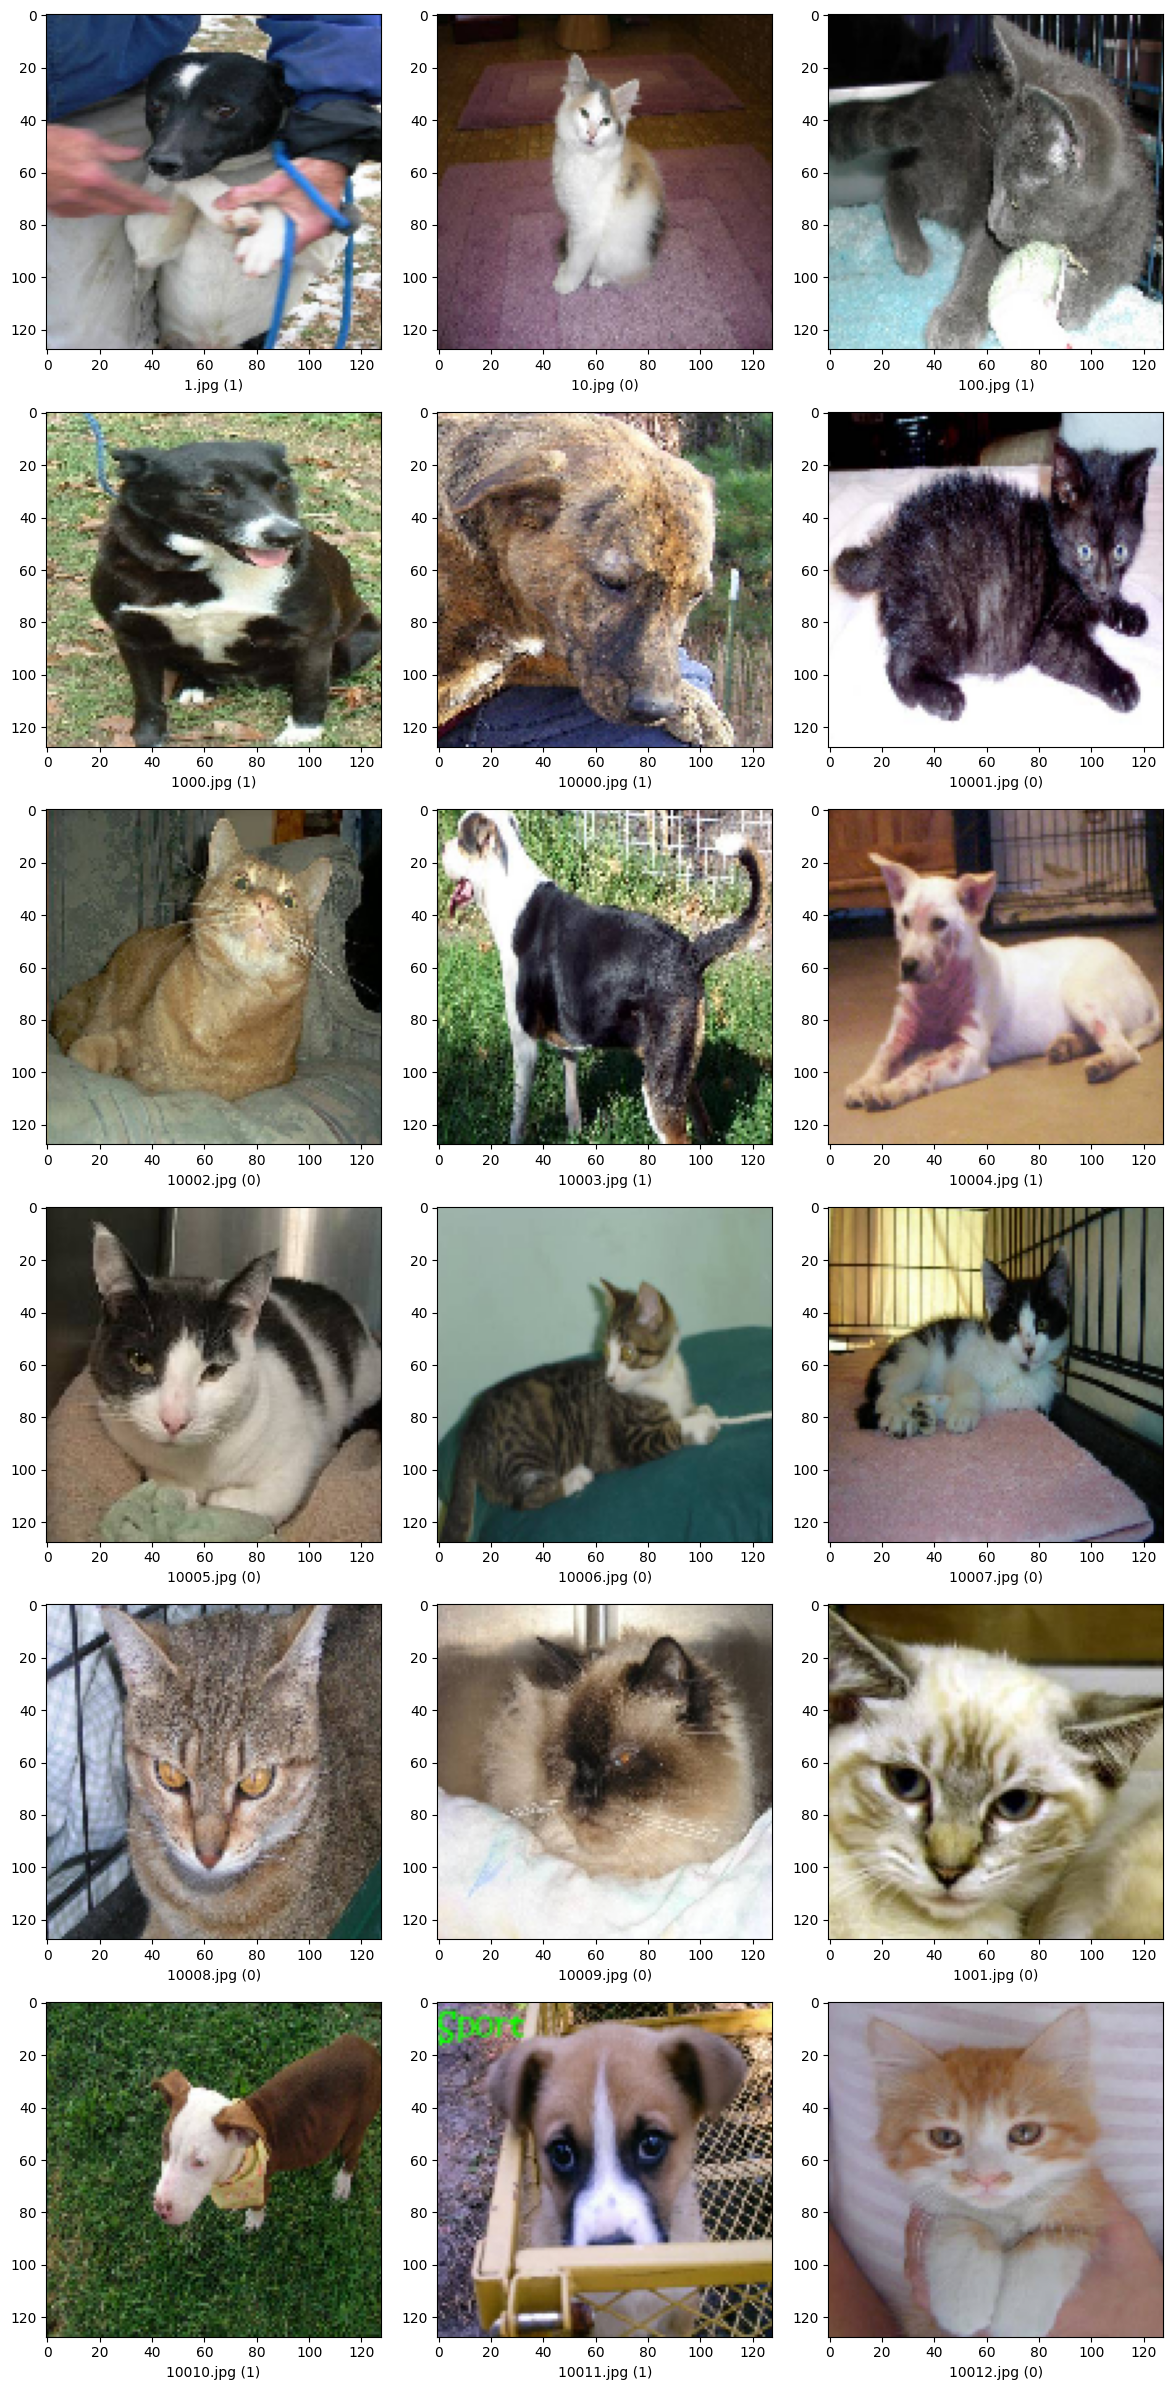

In [ ]:
from PIL import ImageTk, Image

sample_test = test_data.head(18)
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']  
    category = row['label']

    img = load_img("./dogs-vs-cats/test/" + filename, target_size=img_size)
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(f"{filename} ({category})")  
    plt.tight_layout()

plt.show()

# U ovom delu koda se prikazuje prvih 18 fotografija iz direktorijuma.
# Fotografije se prikazuju u mreži sa imenima i ličnim predikcijama modela za određene kategorije.
# Nakon što je sve podešeno prikazuju se fotografije u mreži sa predikcijama.

In [ ]:
from PIL import Image
import numpy as np
from keras._tf_keras.keras.models import load_model
model = load_model ( "CvsD.10epochs.h5" )
results = {
        0: 'cat',
        1: 'dog'
}
im = Image.open ( "./program-test/cat3.jpg" )
im = im.resize ( img_size )
im = np.expand_dims ( im,axis = 0 )
im = np.array ( im )
im = im / 255
predictions = np.argmax ( model.predict ( [ im ] ) [0] )
print ( predictions, results [ predictions ] )

# U ovom delu koda se učitavaju fotografije koje su nepoznate modelu i pripremaju se za predikciju.
# Ovde se koristi prethodno trenirani model koji ispisuje 0 ako je mačka i ako je pas onda 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
0 cat
